Original data can be downloaded from Kaggle.
https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Kaggle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. [Wikipedia](https://en.wikipedia.org/wiki/Kaggle)

In [1]:
pwd

'/Users/ariedamuco/Dropbox/Python-Programming-and-Text-Analysis/Code/ML'

In [2]:
import pandas as pd
amazon = pd.read_csv('../../Inputs/AmazonShort.csv')
amazon

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [3]:
amazon.isnull()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,True,False,False,False,False
996,False,True,False,False,False,False
997,False,True,False,False,False,False
998,False,True,False,False,False,False


<AxesSubplot:>

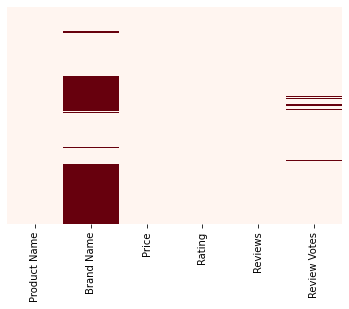

In [4]:
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
sns.heatmap(amazon.isnull(), cmap="Reds", cbar=False, yticklabels=False)

In [5]:
#!pip install vaderSentiment

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [7]:
review = amazon[['Reviews']]

In [8]:
type(review)

pandas.core.frame.DataFrame

In [9]:
review.head()

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...


In [10]:
#dir(sentiment)

In [11]:
print(sentiment.polarity_scores("The phone is super cool!"))

{'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}


In [12]:
sentiment.polarity_scores("The phone is coool!")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [13]:

print(sentiment.polarity_scores("The phone is cool :("))

{'neg': 0.354, 'neu': 0.366, 'pos': 0.28, 'compound': -0.1531}


In [14]:
review.shape

(1000, 1)

In [15]:
review.head()

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...


In [16]:
review['Reviews'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

0      0.8877
1      0.9231
2      0.4927
3      0.9192
4      0.2942
        ...  
995    0.6486
996    0.4404
997    0.8356
998    0.0000
999    0.5719
Name: Reviews, Length: 1000, dtype: float64

In [17]:
review.head()

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...


In [18]:
#rev['polarity']=rev['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x)))

review['compund']=review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])


<ipython-input-18-6a05fe5c0802>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['compund']=review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])


In [19]:
review.head()

,Reviews,compund
0,I feel so LUCKY to have found this used (phone...,0.8877
1,"nice phone, nice up grade from my pantach revu...",0.9231
2,Very pleased,0.4927
3,It works good but it goes slow sometimes but i...,0.9192
4,Great phone to replace my lost phone. The only...,0.2942


In [20]:
review['neutral'] = review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
review['negative'] = review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
review['positive'] = review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

<ipython-input-20-650060e9cab2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['neutral'] = review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
<ipython-input-20-650060e9cab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['negative'] = review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
<ipython-input-20-650060e9cab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [21]:
review.head(7)

,Reviews,compund,neutral,negative,positive
0,I feel so LUCKY to have found this used (phone...,0.8877,0.803,0.014,0.183
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331
2,Very pleased,0.4927,0.238,0.000,0.762
3,It works good but it goes slow sometimes but i...,0.9192,0.538,0.000,0.462
4,Great phone to replace my lost phone. The only...,0.2942,0.901,0.036,0.062
5,I already had a phone with problems... I know ...,-0.9244,0.850,0.150,0.000
6,The charging port was loose. I got that solder...,-0.0516,0.901,0.052,0.047


In [22]:
review.loc[6, 'Reviews']

'The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.'

In [27]:
review.columns

Index(['Reviews', 'compund', 'neutral', 'negative', 'positive', 'sentiment'], dtype='object')

In [26]:
review['sentiment']=''

In [30]:
review.loc[review.compund>0.05, 'sentiment']='Positive'
review.loc[(review.compund>-0.05) & (review.compund<0.05), 'sentiment']='Neutral'
review.loc[review.compund<-0.05, 'sentiment']='Negative'

In [31]:
review.head(7)

,Reviews,compund,neutral,negative,positive,sentiment
0,I feel so LUCKY to have found this used (phone...,0.8877,0.803,0.014,0.183,Positive
1,"nice phone, nice up grade from my pantach revu...",0.9231,0.597,0.072,0.331,Positive
2,Very pleased,0.4927,0.238,0.000,0.762,Positive
3,It works good but it goes slow sometimes but i...,0.9192,0.538,0.000,0.462,Positive
4,Great phone to replace my lost phone. The only...,0.2942,0.901,0.036,0.062,Positive
5,I already had a phone with problems... I know ...,-0.9244,0.850,0.150,0.000,Negative
6,The charging port was loose. I got that solder...,-0.0516,0.901,0.052,0.047,Negative


In [32]:
amazon.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [33]:
amazon[['compund', 'sentiment']]=review[['compund', 'sentiment']]

In [34]:
amazon.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,compund,sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,0.8877,Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,0.9231,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,0.4927,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,0.9192,Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,0.2942,Positive


<AxesSubplot:xlabel='Rating', ylabel='count'>

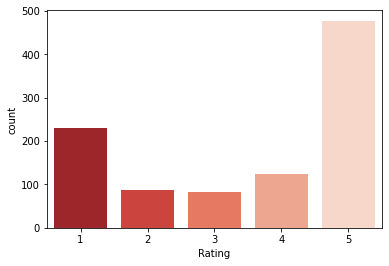

In [35]:
import seaborn as sns
sns.countplot(x='Rating', data=amazon, palette="Reds_r")

<AxesSubplot:xlabel='sentiment', ylabel='count'>

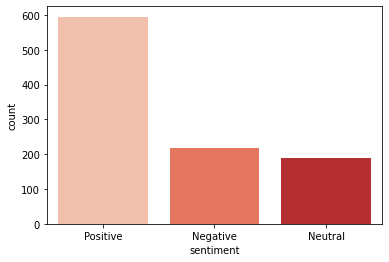

In [36]:
sns.countplot(x='sentiment', data=amazon, palette="Reds")

In [37]:
seq_col_reds = sns.color_palette("Reds_r", 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

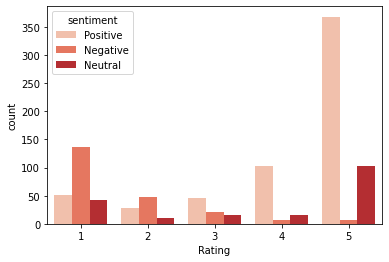

In [38]:
sns.countplot(x='Rating', hue="sentiment", data=amazon, palette="Reds")

### References
https://www.nltk.org/_modules/nltk/sentiment/vader.html

http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

https://github.com/cjhutto/vaderSentiment

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f